![](unnamed.png)
<div style = "text-align: center">

# Analisis de datos masivos

## Nombre Del Docente
### Jose Gabriel Rodriguez Rivas

## Nombre Del Alumno
### Jesus Antonio Santillan Cepeda

</div>

In [1]:
import pandas as pd
import numpy as np
import sklearn
#create a pandas dataframe called "training" from the titanic-train.csv file
training = pd.read_csv("titanic-train.csv")

Con los datos de arriba, ¿qué tipos de preguntas podemos hacer acerca de los factores que contribuyeron a que los pasajeros sobrevivan o fallecieran en la catástrofe del Titanic? puede ser el tipo de sexo y por numero de cabina

In [2]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
PassengerId    915 non-null int64
Survived       915 non-null int64
Pclass         915 non-null int64
Name           915 non-null object
Gender         915 non-null object
Age            738 non-null float64
SibSp          915 non-null int64
Parch          915 non-null int64
Ticket         915 non-null object
Fare           915 non-null float64
Cabin          202 non-null object
Embarked       914 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 68.0+ KB


¿Faltan valores en el conjunto de datos? falto la edad y los numeros de cabina

In [4]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",male,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",male,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",male,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S


## Paso 2: Preparar los datos para el modelo de árbol de decisiones

In [5]:
training["Gender"] = training["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [6]:
training.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,1,"Davidson, Mr. Thornton",0,31.0,1,0,F.C. 12750,52.0000,B71,S
1,2,0,3,"Asim, Mr. Adola",0,35.0,0,0,SOTON/O.Q. 3101310,7.0500,NaN,S
2,3,0,3,"Nankoff, Mr. Minko",0,NaN,0,0,349218,7.8958,NaN,S
3,4,0,1,"Thayer, Mr. John Borland",0,49.0,1,1,17421,110.8833,C68,C
4,5,0,3,"Strandberg, Miss. Ida Sofia",1,22.0,0,0,7553,9.8375,NaN,S


In [7]:
training["Age"].fillna(training["Age"].mean(), inplace=True)

In [8]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915 entries, 0 to 914
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  915 non-null    int64  
 1   Survived     915 non-null    int64  
 2   Pclass       915 non-null    int64  
 3   Name         915 non-null    object 
 4   Gender       915 non-null    int64  
 5   Age          915 non-null    float64
 6   SibSp        915 non-null    int64  
 7   Parch        915 non-null    int64  
 8   Ticket       915 non-null    object 
 9   Fare         915 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     914 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 85.9+ KB


In [9]:
training.tail()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
910,911,0,3,"Baccos, Mr. Raffull",0,20.000000,0,0,2679,7.2250,NaN,C
911,912,0,1,"Smith, Mr. Richard William",0,29.970867,0,0,113056,26.0000,A19,S
912,913,0,3,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,NaN,S
913,914,0,3,"Johnson, Mr. Alfred",0,49.000000,0,0,LINE,0.0000,NaN,S
914,915,0,3,"Fox, Mr. Patrick",0,29.970867,0,0,368573,7.7500,NaN,Q


## ¿Cuál es el valor que se utilizó para reemplazar a las edades faltantes?29.9708


In [10]:
y_target = training["Survived"].values

In [11]:
columns = ["Fare", "Pclass", "Gender", "Age", "SibSp"]
#create the variable to hold the features that the classifier will use
X_input = training[list(columns)].values

In [12]:
from sklearn import tree

#create clf_train as a decision tree classifier object
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#train the model using the fit() method of the decision tree object. 
#Supply the method with the input variable X_in
clf_train = clf_train.fit(X_input, y_target)

In [13]:
clf_train.score(X_input,y_target)

0.8163934426229508

In [14]:
clasificacion=['Sobrevive','No Sobrevive']

In [15]:
with open("titanic.dot", 'w') as f:
  f = tree.export_graphviz(clf_train, out_file=f, feature_names=columns,class_names=clasificacion)

In [17]:
!dot -Tpng titanic.dot -o titanic.png

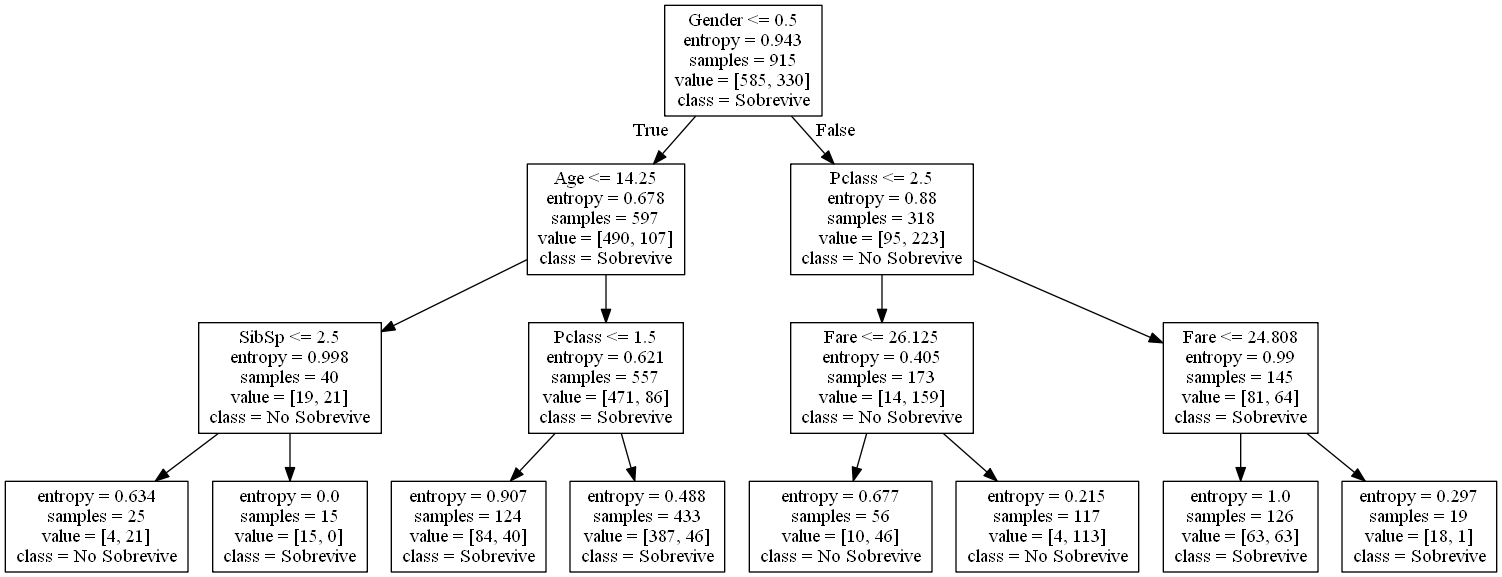

In [18]:
from IPython.display import Image

#display the decison tree graphic
Image("titanic.png")

## ¿Qué describe al grupo que tenía mayor cantidad de víctimas fatales? ¿Qué grupo tenía la mayor cantidad de sobrevivientes?

## Parte 2: Aplicar el modelo del árbol de decisiones

In [19]:
testing = pd.read_csv("titanic-test.csv")
testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393 entries, 0 to 392
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  393 non-null    int64  
 1   Survived     393 non-null    int64  
 2   Pclass       393 non-null    int64  
 3   Name         393 non-null    object 
 4   Gender       393 non-null    object 
 5   Age          307 non-null    float64
 6   SibSp        393 non-null    int64  
 7   Parch        393 non-null    int64  
 8   Ticket       393 non-null    object 
 9   Fare         393 non-null    float64
 10  Cabin        93 non-null     object 
 11  Embarked     392 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 37.0+ KB


## ¿Cuántos registros hay en el conjunto de datos? 393

## ¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan? Cabin Y Age

In [20]:
testing["Gender"] = testing["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [21]:
testing["Age"].fillna(testing["Age"].mean(), inplace=True)

In [22]:
testing.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,916,0,2,"Coleridge, Mr. Reginald Charles",0,29.0,0,0,W./C. 14263,10.50,NaN,S
1,917,1,1,"Spedden, Mrs. Frederic Oakley (Margaretta Corn...",1,40.0,1,1,16966,134.50,E34,C
2,918,0,3,"Windelov, Mr. Einar",0,21.0,0,0,SOTON/OQ 3101317,7.25,NaN,S
3,919,1,1,"Minahan, Miss. Daisy E",1,33.0,1,0,19928,90.00,C78,Q
4,920,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.00,NaN,S


In [23]:
X_input = testing[list(columns)].values

In [24]:
target_labels = clf_train.predict(X_input)
target_labels = pd.DataFrame({'Est_Survival':target_labels, 'Name':testing['Name']})

In [25]:
import numpy as np
# Load data for all passengers in the variable all_data
all_data = pd.read_csv("titanic_all.csv")
# Merging using the field Name as key, selects only the rows of the two datasets that refer to the same passenger
testing_results = pd.merge(target_labels, all_data[['Name','Survived']], on=['Name'])

# Compute the accuracy as a ratio of matching observations to total osbervations. Store this in in the variable acc.
acc = np.sum(testing_results['Est_Survival'] == testing_results['Survived']) / float(len(testing_results))
print(acc)

0.7588832487309645


## Parte 3: Evaluar el modelo del árbol de decisiones

In [26]:
all_data = pd.read_csv("titanic_all.csv", usecols=['Survived','Pclass','Gender','Age','SibSp','Fare'])
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1308 non-null   int64  
 1   Pclass    1308 non-null   int64  
 2   Gender    1308 non-null   object 
 3   Age       1045 non-null   float64
 4   SibSp     1308 non-null   int64  
 5   Fare      1308 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 61.4+ KB


## ¿Cuántos registros hay en el conjunto de datos? 1308

## ¿Qué variable(s) importante(s) son valores faltantes y cuántas faltan? Age y 263

In [27]:
all_data["Gender"] = all_data["Gender"].apply(lambda toLabel: 0 if toLabel == 'male' else 1)

In [28]:
all_data["Age"].fillna(all_data["Age"].mean(), inplace=True)

In [29]:
#create the input and target variables as uppercase X and lowercase y. Reuse the columns variable.
X = all_data[list(columns)].values
y = all_data["Survived"].values

#generate the four testing and training data arrays with the train_test_split() method
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.40, random_state=0)

NameError: name 'train_test_split' is not defined

In [30]:
type(X_train)

NameError: name 'X_train' is not defined

In [31]:
clf_train = tree.DecisionTreeClassifier(criterion="entropy", max_depth=3)

#fit the training model using the input and target variables
clf_train = clf_train.fit(X_train, y_train)

NameError: name 'X_train' is not defined